<a href="https://colab.research.google.com/github/alessandrobruni/tensorflow_intro/blob/main/C1W3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3: Improve MNIST with Convolutions

In the videos you looked at how you would improve Fashion MNIST using Convolutions. For this exercise see if you can improve MNIST to 99.5% accuracy or more by adding only a single convolutional layer and a single MaxPooling 2D layer to the model from the  assignment of the previous week. 

You should stop training once the accuracy goes above this amount. It should happen in less than 10 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your callback.

When 99.5% accuracy has been hit, you should print out the string "Reached 99.5% accuracy so cancelling training!"


In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Load the data

Begin by loading the data. A couple of things to notice:

- The file `mnist.npz` is already included in the current workspace under the `data` directory. By default the `load_data` from Keras accepts a path relative to `~/.keras/datasets` but in this case it is stored somewhere else, as a result of this, you need to specify the full path.

- `load_data` returns the train and test sets in the form of the tuples `(x_train, y_train), (x_test, y_test)` but in this exercise you will be needing only the train set so you can ignore the second tuple.

In [4]:
# Load the data

# Get current working directory
current_dir = os.getcwd() 

# Append data/mnist.npz to the previous path to get the full path
#data_path = os.path.join(current_dir, "data/mnist.npz") 
#data_path = os.path.join(current_dir, "data/mnist.npz") 

# Get only training set
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path='/content/drive/MyDrive/ColabNotebooks/TFC/C1/data/mnist3.npz') 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
training_images.shape

(60000, 28, 28)

In [26]:
import matplotlib.pyplot as plt
np.set_printoptions(linewidth=320)

(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

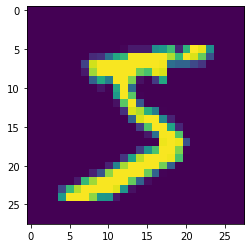

In [22]:

#plt.imshow(training_images[0], cmap=plt.get_cmap('gray'))
img0 = training_images[0]
display(img0.shape)
display(img0)
plt.imshow(img0)

In [23]:
training_images_reshaped =training_images.reshape(training_images.shape[0],28,28,1)

In [24]:
training_images_reshaped.shape

(60000, 28, 28, 1)

In [38]:
img_reshaped_0 = training_images_reshaped[0]
display(img_reshaped_0.shape)
display(img_reshaped_0)

(28, 28, 1)

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

TypeError: ignored

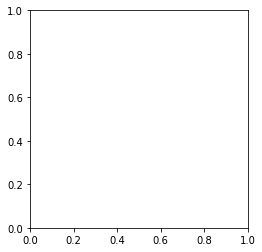

In [39]:
 plt.imshow(img_reshaped_0)

plt. imgshow throws an error on displaying the image when reshaped
Try with cv2 in  colab but not working

```
import cv2

cv2.imshow('img0',img0)
cv2.imshow('img0 reshaped',img_reshaped_0)
# Maintain output window utill user presses a key
cv2.waitKey(0)        

# Destroying present windows on screen
cv2.destroyAllWindows()
```
So used the colab patch to display the image.

I wanted to see if the one channle reshaping was correct displaying the image.



In [37]:
import cv2 #not working
from google.colab.patches import cv2_imshow
cv2_imshow(img0)
cv2_imshow(img_reshaped_0)


## Pre-processing the data

One important step when dealing with image data is to preprocess the data. During the preprocess step you can apply transformations to the dataset that will be fed into your convolutional neural network.

Here you will apply two transformations to the data:
- Reshape the data so that it has an extra dimension. The reason for this 
is that commonly you will use 3-dimensional arrays (without counting the batch dimension) to represent image data. The third dimension represents the color using RGB values. This data might be in black and white format so the third dimension doesn't really add any additional information for the classification process but it is a good practice regardless.


- Normalize the pixel values so that these are values between 0 and 1. You can achieve this by dividing every value in the array by the maximum.

Remember that these tensors are of type `numpy.ndarray` so you can use functions like [reshape](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) or [divide](https://numpy.org/doc/stable/reference/generated/numpy.divide.html) to complete the `reshape_and_normalize` function below:

In [40]:
# GRADED FUNCTION: reshape_and_normalize

def reshape_and_normalize(images):
    
    ### START CODE HERE

    # Reshape the images to add an extra dimension
    images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1 )
    
    # Normalize pixel values
    images = images / np.max(images)
    
    ### END CODE HERE

    return images

Test your function with the next cell:

In [41]:
# Reload the images in case you run this cell multiple times
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path='/content/drive/MyDrive/ColabNotebooks/TFC/C1/data/mnist3.npz') 

# Apply your function
training_images = reshape_and_normalize(training_images)

print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")


Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


**Expected Output:**
```
Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)
```

## Defining your callback

Now complete the callback that will ensure that training will stop after an accuracy of 99.5% is reached.

Define your callback in such a way that it checks for the metric `accuracy` (`acc` can normally be used as well but the grader expects this metric to be called `accuracy` so to avoid getting grading errors define it using the full word).

In [51]:
# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
    # Define the method that checks the accuracy at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
      '''
      Halts the training after reaching 60 percent accuracy

      Args:
        epoch (integer) - index of epoch (required but unused in the function definition below)
        logs (dict) - metric results from the training epoch
      '''
      print(f"\nLOGS : {logs}\n")
      accuracy= logs.get('accuracy')
      if(accuracy is not None and accuracy < 0.995):
        pass
      else:
        #Stop the process
        print(f"\nAccuracy reached is more then 99,5% : {accuracy}")     
        self.model.stop_training = True

### END CODE HERE


## Convolutional Model

Finally, complete the `convolutional_model` function below. This function should return your convolutional neural network.

**Your model should achieve an accuracy of 99.5% or more before 10 epochs to pass this assignment.**

**Hints:**
- You can try any architecture for the network but try to keep in mind you don't need a complex one. For instance, only one convolutional layer is needed.
- In case you need extra help you can check out an architecture that works pretty well at the end of this notebook.
- To avoid timeout issues with the autograder, please limit the number of units in your convolutional and dense layers. An exception will be raised if your model is too large.

In [52]:
# GRADED FUNCTION: convolutional_model
def convolutional_model():
    ### START CODE HERE

    # Define the model
    model = tf.keras.models.Sequential([

      # Add convolutions and max pooling        
        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(2,2) ,
        tf.keras.layers.Conv2D(64,(3,3),activation = 'relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(2,2) ,
      
      # Add input, neurons, outputs 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10,activation = 'softmax')
    ]) 

    ### END CODE HERE

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
        
    return model

In [54]:
# Print the model summary
convolutional_model().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [53]:
# Save your untrained model
model = convolutional_model()

# Get number of weights
model_params = model.count_params()

# Unit test to limit the size of the model
assert model_params < 1000000, (
    f'Your model has {model_params:,} params. For successful grading, please keep it ' 
    f'under 1,000,000 by reducing the number of units in your Conv2D and/or Dense layers.'
)

# Instantiate the callback class
callbacks = myCallback()

# Train your model (this can take up to 5 minutes)
history = model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1206 - accuracy: 0.9628
LOGS : {'loss': 0.12059203535318375, 'accuracy': 0.9628000259399414}

1875/1875 [==============================] - 109s 58ms/step - loss: 0.1206 - accuracy: 0.9628
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9876
LOGS : {'loss': 0.040189117193222046, 'accuracy': 0.987583339214325}

1875/1875 [==============================] - 99s 53ms/step - loss: 0.0402 - accuracy: 0.9876
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0272 - accuracy: 0.9917
LOGS : {'loss': 0.02720441110432148, 'accuracy': 0.9916999936103821}

1875/1875 [==============================] - 104s 55ms/step - loss: 0.0272 - accuracy: 0.9917
Epoch 4/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9943
LOGS : {'loss': 0.01929527148604393, 'accuracy': 0.9943166375160217}

1875/1875 [==============================] - 10

If you see the message that you defined in your callback printed out after less than 10 epochs it means your callback worked as expected. You can also double check by running the following cell:

In [55]:
print(f"Your model was trained for {len(history.epoch)} epochs")

Your model was trained for 5 epochs


If your callback didn't stop training, one cause might be that you compiled your model using a metric other than `accuracy` (such as `acc`). Make sure you set the metric to `accuracy`. You can check by running the following cell:

In [ ]:
if not "accuracy" in history.model.metrics_names:
    print("Use 'accuracy' as metric when compiling your model.")
else:
    print("The metric was correctly defined.")

## Need more help?

Run the following cell to see an architecture that works well for the problem at hand:

In [ ]:
# WE STRONGLY RECOMMEND YOU TO TRY YOUR OWN ARCHITECTURES FIRST
# AND ONLY RUN THIS CELL IF YOU WISH TO SEE AN ANSWER

import base64

encoded_answer = "CiAgIC0gQSBDb252MkQgbGF5ZXIgd2l0aCAzMiBmaWx0ZXJzLCBhIGtlcm5lbF9zaXplIG9mIDN4MywgUmVMVSBhY3RpdmF0aW9uIGZ1bmN0aW9uIGFuZCBhbiBpbnB1dCBzaGFwZSB0aGF0IG1hdGNoZXMgdGhhdCBvZiBldmVyeSBpbWFnZSBpbiB0aGUgdHJhaW5pbmcgc2V0CiAgIC0gQSBNYXhQb29saW5nMkQgbGF5ZXIgd2l0aCBhIHBvb2xfc2l6ZSBvZiAyeDIKICAgLSBBIEZsYXR0ZW4gbGF5ZXIgd2l0aCBubyBhcmd1bWVudHMKICAgLSBBIERlbnNlIGxheWVyIHdpdGggMTI4IHVuaXRzIGFuZCBSZUxVIGFjdGl2YXRpb24gZnVuY3Rpb24KICAgLSBBIERlbnNlIGxheWVyIHdpdGggMTAgdW5pdHMgYW5kIHNvZnRtYXggYWN0aXZhdGlvbiBmdW5jdGlvbgo="
encoded_answer = encoded_answer.encode('ascii')
answer = base64.b64decode(encoded_answer)
answer = answer.decode('ascii')

print(answer)

**Congratulations on finishing this week's assignment!**

You have successfully implemented a CNN to assist you in the image classification task. Nice job!

**Keep it up!**